In [27]:
# SET IMAGE AND SHAPEFILE DIRECTORIES
import rasterio as rio
import rioxarray as rxr
import matplotlib.pyplot as plt


dirImgLoc = r'D:/imagery/masters/sentinel-2/USGS/S2_refl_20171128_b5_8a_12.tif'
dirImgLocPost = r'D:/imagery/masters/sentinel-2/USGS/S2_refl_20171228_b5_8a_12.tif'
print(dirImgLoc)



D:/imagery/masters/sentinel-2/USGS/S2_refl_20171128_b5_8a_12.tif


In [35]:
#This function was created using USGS published imagery for the Thomas Fire area only. If using non-stacked imagery, refer to samuel_taylor_MSM1.ipynb for NBR & dNBR calculations.

def dNBR(dir, dir2, band1, band2, plot=False):
    
    #Prefire NBR. 
    Prefire = rxr.open_rasterio(dir, masked=True)
    PreNIR = Prefire.sel(band=int(band1))
    PreSWIR = Prefire.sel(band=int(band2))
    PreNBR = (PreNIR - PreSWIR) / (PreNIR + PreSWIR)

    #Postfire NBR.
    Postfire = rxr.open_rasterio(dir2, masked=True)
    PostNIR = Postfire.sel(band=int(band1))
    PostSWIR = Postfire.sel(band=int(band2))
    PostNBR = (PostNIR - PostSWIR) / (PostNIR + PostSWIR)

    #Differenced NBR.
    dNBR = PreNBR - PostNBR

    if plot == True:
        dNBR.squeeze().plot.imshow(cmap = 'inferno')
    
    return dNBR

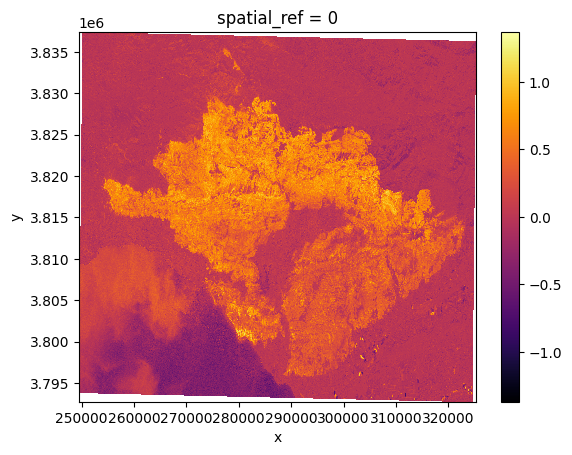

In [34]:
FireSeverity = dNBR(dirImgLoc, dirImgLocPost, 2, 3, True)